# Customer churn prediction

### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
x = pd.read_csv('churn-bigml-80.csv')
y =  pd.read_csv('churn-bigml-20.csv')

In [4]:
train_df = pd.concat([x,y], axis=0)

### Overview the dataset

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   float6

### Data describtion

In [6]:
train_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [7]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   float6

### Transform the data

In [9]:
train_df['Churn'] = train_df['Churn'].replace({True:1, False:0})

C:\Users\QUI\AppData\Local\Temp\ipykernel_16380\4031390828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Churn'] = train_df['Churn'].replace({True:1, False:0})


In [10]:
train_df['Churn'] = train_df['Churn'].astype('category')

In [11]:
features = ['International plan','Voice mail plan','Area code','State']
def convert_cat(df, features):
    for ft in features:
        df[ft] = df[ft].astype('category')

convert_cat(train_df, features)            

### Exploratory Data Analysis (EDA)

In [12]:
train_df['Churn'].value_counts().to_frame()

,count
Churn,
0,2850
1,483


In [13]:
train_df['Churn'].value_counts(normalize=True).to_frame()

,proportion
Churn,
0,0.855086
1,0.144914


In [14]:
train_df['International plan'].value_counts().to_frame()

,count
International plan,
No,3010
Yes,323


<Axes: xlabel='International plan', ylabel='count'>

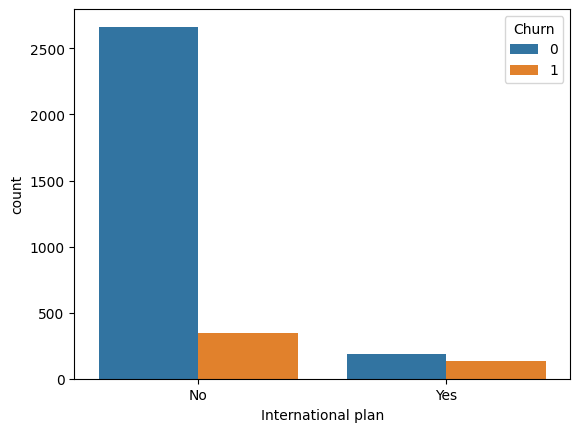

In [15]:
sns.countplot(data=train_df, x ='International plan', hue='Churn')

<Axes: xlabel='Voice mail plan', ylabel='count'>

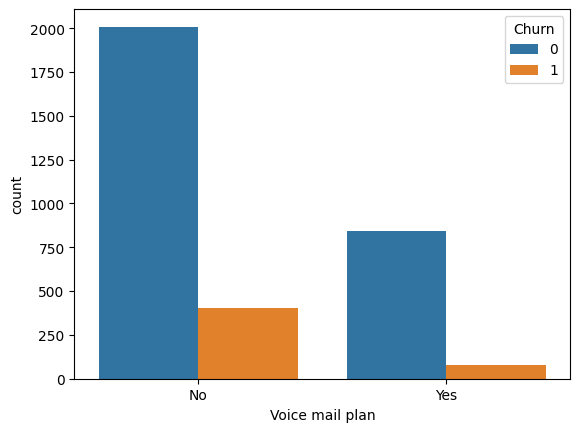

In [16]:
sns.countplot(data=train_df, x ='Voice mail plan', hue='Churn')

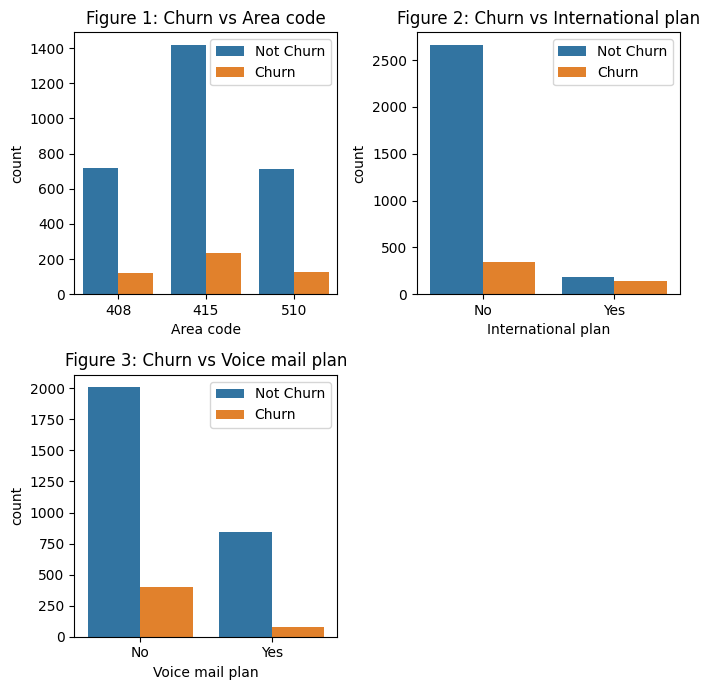

In [17]:
cols = ['Area code','International plan', 'Voice mail plan']
n_rows = 2
n_cols = 2

fid,ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5,n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index to loop through list 'cols'
        if i<len(cols):
            ax_i  = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Churn', ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Churn vs {cols[i]}')
            ax_i.legend( title='', loc = 'upper right', labels= ['Not Churn', 'Churn'])
ax.flat[-1].set_visible(False)            
plt.tight_layout()            
plt.show()

### Call during the day

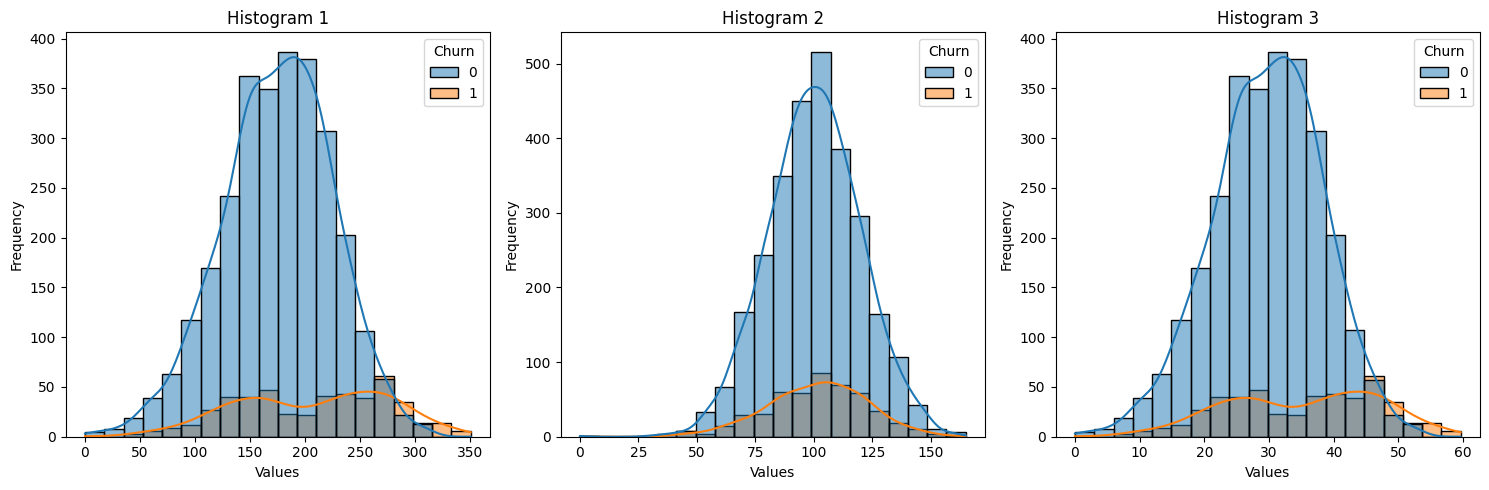

In [19]:
plt.figure(figsize=(15, 5))
# Histogram 1
plt.subplot(1, 3, 1) 
sns.histplot(train_df,x='Total day minutes',hue='Churn', bins=20, color='skyblue', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 1')

# Histogram 2
plt.subplot(1, 3, 2)  
sns.histplot(train_df,x='Total day calls',hue='Churn', bins=20, color='salmon', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 2')

# Histogram 3
plt.subplot(1, 3, 3)  
sns.histplot(train_df,x='Total day charge',hue='Churn', bins=20, color='green', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 3')

plt.tight_layout()  

### Call during the everning

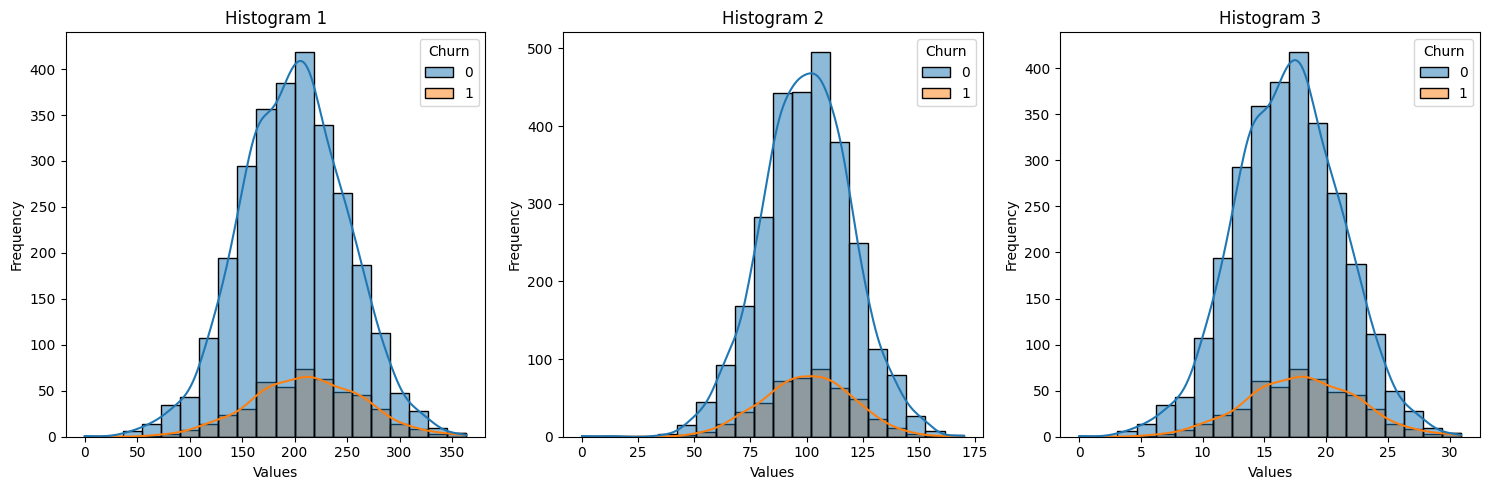

In [20]:
plt.figure(figsize=(15, 5))
# Histogram 1
plt.subplot(1, 3, 1) 
sns.histplot(train_df,x='Total eve minutes',hue='Churn', bins=20, color='skyblue', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 1')

# Histogram 2
plt.subplot(1, 3, 2)  
sns.histplot(train_df,x='Total eve calls',hue='Churn', bins=20, color='salmon', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 2')

# Histogram 3
plt.subplot(1, 3, 3)  
sns.histplot(train_df,x='Total eve charge',hue='Churn', bins=20, color='green', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 3')

plt.tight_layout()  
plt.show()

### Call during the night

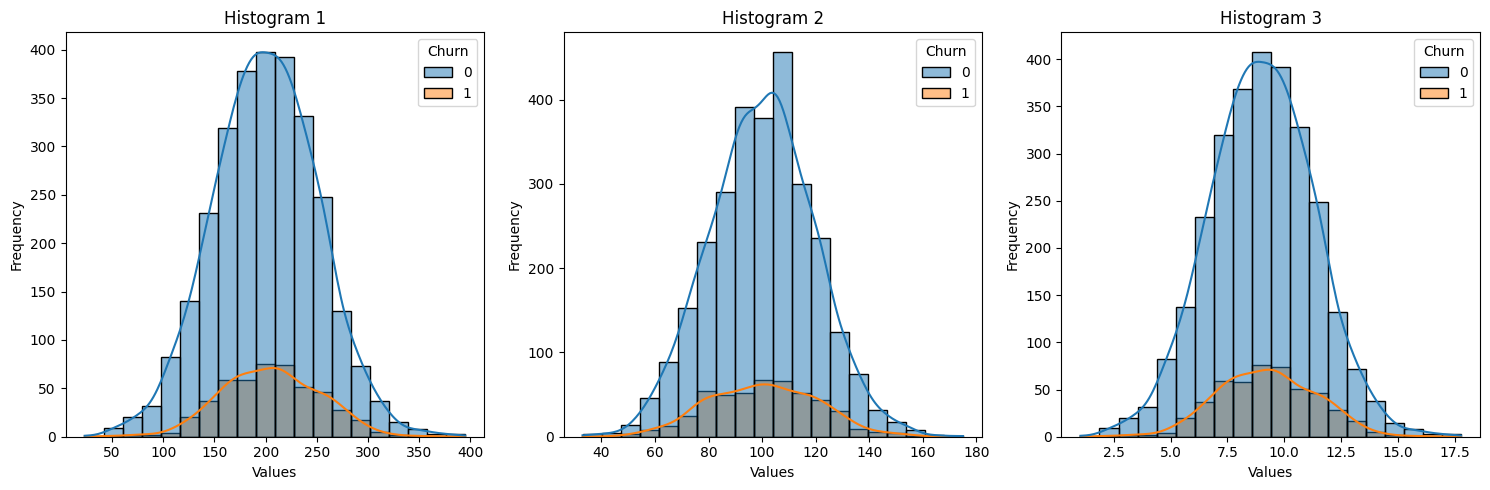

In [21]:
plt.figure(figsize=(15, 5))
# Histogram 1
plt.subplot(1, 3, 1)  
sns.histplot(train_df,x='Total night minutes',hue='Churn', bins=20, color='skyblue', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 1')

# Histogram 2
plt.subplot(1, 3, 2)  
sns.histplot(train_df,x='Total night calls',hue='Churn', bins=20, color='salmon', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 2')

# Histogram 3
plt.subplot(1, 3, 3) 
sns.histplot(train_df,x='Total night charge',hue='Churn', bins=20, color='green', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 3')

plt.tight_layout()
plt.show()

### International call

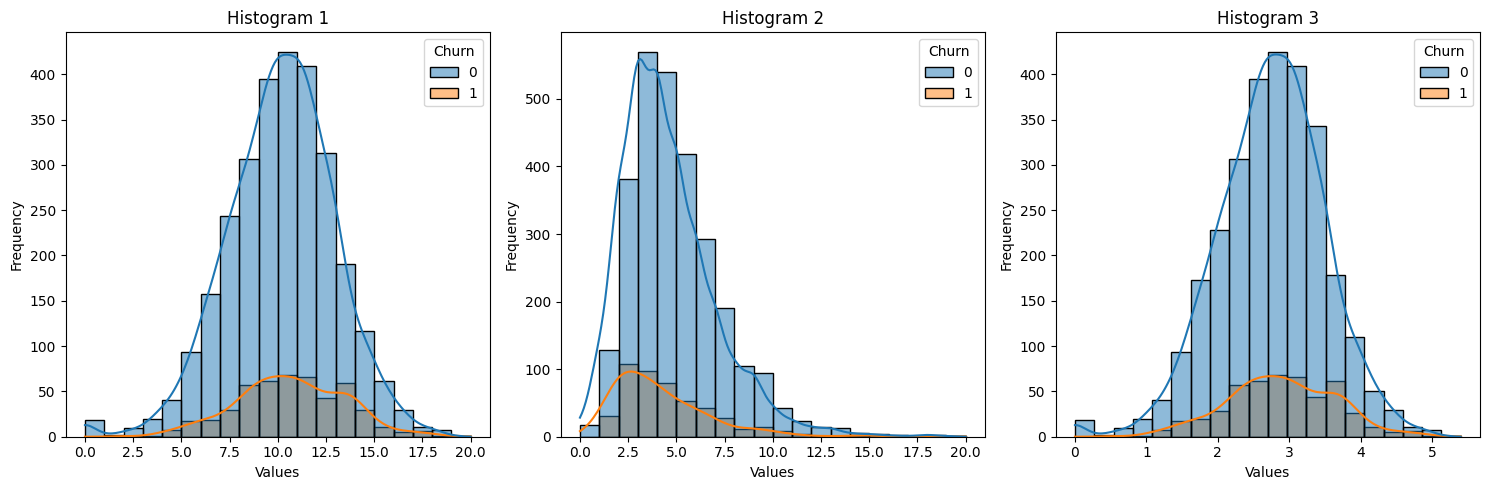

In [22]:
plt.figure(figsize=(15, 5))
# Histogram 1
plt.subplot(1, 3, 1)
sns.histplot(train_df,x='Total intl minutes',hue='Churn', bins=20, color='skyblue', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 1')

# Histogram 2
plt.subplot(1, 3, 2) 
sns.histplot(train_df,x='Total intl calls',hue='Churn', bins=20, color='salmon', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 2')

# Histogram 3
plt.subplot(1, 3, 3)
sns.histplot(train_df,x='Total intl charge',hue='Churn', bins=20, color='green', kde=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram 3')

plt.tight_layout() 
plt.show()

### Choose the features

In [23]:
cat_features = ['Area code','International plan','Voice mail plan']
num_features = ['Number vmail messages','Customer service calls',
                 'Total day minutes','Total day calls','Total day charge',
                 'Total eve minutes','Total eve calls','Total eve charge',
                 'Total night minutes','Total night calls','Total night charge',
                 'Total intl minutes','Total intl calls','Total intl charge']

features_cols = num_features + cat_features

In [24]:
x = train_df[features_cols]
y = train_df['Churn']

### Preprocess Pineline

In [25]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [26]:
num_tranformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_tranformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [27]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_tranformer, num_features),
    ('cat',cat_tranformer,cat_features)
])

In [28]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Number vmail messages',
                                  'Customer service calls', 'Total day minutes',
                                  'Total day calls', 'Total day charge',
                                  'Total eve minutes', 'Total eve calls',
                                  'Total eve charge', 'Total night minutes',
                                  'Total night calls', 'Total night charge',
                                  'Total intl minutes', 'Total intl calls',
                                  'Total intl charge']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Area code', 'International plan',
                                  'Voice mail plan'])])

In [29]:
x = preprocessor.transform(x)

### Model Training

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report,confusion_matrix

In [33]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [34]:
log_reg.score(x_val,y_val)

0.856071964017991

In [35]:
y_pre = log_reg.predict(x_val)

In [36]:
prediction= pd.DataFrame({'y': y_val, 'y_pre': y_pre})

In [37]:
precision_score(y_val,y_pre)

0.5714285714285714

In [38]:
print(classification_report(y_val,y_pre))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.57      0.20      0.29       101

    accuracy                           0.86       667
   macro avg       0.72      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



In [39]:
Prediction = pd.DataFrame({ 'predict' :y_pre,'Value': y_val})

### Upgrade the model

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)


In [41]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [42]:
poly_log_reg.fit(poly_features_x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [43]:
poly_log_reg.score(poly_features_x_val,y_val)

0.8980509745127436

In [44]:
y_pred = poly_log_reg.predict(poly_features_x_val)

In [45]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       566
           1       0.69      0.60      0.64       101

    accuracy                           0.90       667
   macro avg       0.81      0.78      0.79       667
weighted avg       0.89      0.90      0.90       667



In [46]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2024)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2024)

In [47]:
dec_tree.score(x_val,y_val)

0.9505247376311844

In [ ]:
Pre_tree = dec_tree.predict(x_val)

In [49]:
precision_score(Pre_tree,y_val)

0.7821782178217822